In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import preprocess
import pandas as pd
import numpy as np
import seaborn as sns

In [88]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16    # x-axis
fig_size[1] = 12    # y-axis
plt.rcParams["figure.figsize"] = fig_size
# sns.set_theme(style="darkgrid")

In [2]:
# Preprocessing data and getting dataframe

df = preprocess.preprocess()
df.shape

(808828, 59)

In [3]:
# Saving preprocessed data without headers

df.to_csv('processed_data_train.csv',index=False)

In [4]:
temp_df = pd.read_csv('processed_data.csv', header=0)
temp_df.shape

(826561, 69)

In [ ]:
# Heatmap of departure day, airline with avg flight cost

temp = df.pivot_table(index='departure_day', columns='airline', values='flight_cost', aggfunc='mean')
sns.heatmap(temp. linewidths=.5)

In [ ]:
# Heatmap of days to depart, airline with avg flight cost

temp = df.pivot_table(index='days_to_depart', columns='airline', values='flight_cost', aggfunc='mean')
sns.heatmap(temp. linewidths=.5)

In [ ]:
# Heatmap of departure day, flight_path with avg. flight cost

temp = df.pivot_table(index='departure_day', columns='flight_path', values='flight_cost', aggfunc='mean')
sns.heatmap(temp, linewidths=.5)

In [ ]:

temp = df.loc[:,['flight_path','airline','departure_time_day','booking_day','departure_day','departure_time','flight_cost','number_of_stops']]
temp['flight_path']=temp['flight_path'].astype('category').cat.codes
temp['airline']=temp['airline'].astype('category').cat.codes
temp['departure_time_day']=temp['departure_time_day'].astype('category').cat.codes
temp['departure_time']=temp['departure_time'].astype('category').cat.codes
sns.pairplot(temp)

In [ ]:
temp = df.loc[:,['flight_path','airline','departure_time_day','booking_day','departure_day','departure_time','flight_cost','number_of_stops']]
temp['flight_path']=temp['flight_path'].astype('category').cat.codes
temp['airline']=temp['airline'].astype('category').cat.codes
temp['departure_time_day']=temp['departure_time_day'].astype('category').cat.codes
temp['departure_time']=temp['departure_time'].astype('category').cat.codes
sns.heatmap(temp.corr(), linewidths=.5)

In [ ]:
# Correlation heatmap for flight cost

temp = df.loc[:,['flight_path','airline','departure_time_day','booking_day','departure_day','departure_time','flight_cost','number_of_stops']]
temp['flight_path']=temp['flight_path'].astype('category').cat.codes
temp['airline']=temp['airline'].astype('category').cat.codes
temp['departure_time_day']=temp['departure_time_day'].astype('category').cat.codes
temp['departure_time']=temp['departure_time'].astype('category').cat.codes
cor = temp.corr()
# t = sns.dark_palette("#3eada7", as_cmap=True)
plt.figure(figsize=(14,3))
sns.heatmap(cor.loc[['flight_cost']], linewidths=.5)

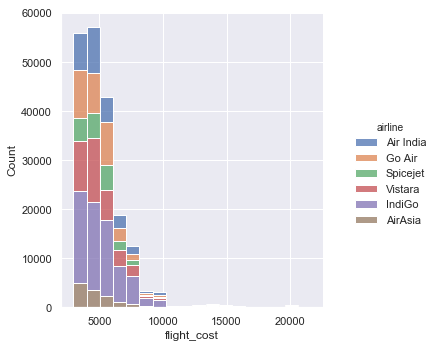

In [89]:
# Flight cost and frequency for each airline

# sns.displot(data=df, x="flight_cost", hue="airline", kind="kde", fill=True)
sns.displot(data=df, x="flight_cost", hue="airline", multiple="stack", bins=18)
# sns.barplot(data=df, x="airline", hue="flight_cost", estimator = np.median)
# sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

In [ ]:
# Print frequencies of each airline

df['airline'].value_counts()

In [ ]:
# Avg, min and max flight cost for each airline vs days_to_depart

cmap = plt.get_cmap('jet_r')

# airlines = df['airline'].unique()[:6]


for i in range(len(airlines)):
    sliced_data = df.loc[df['airline'] == airlines[i]]
    res = sliced_data.groupby('days_to_depart').agg({'flight_cost': ['mean', 'min', 'max']}).reset_index(drop=True)
    res.columns = res.columns.droplevel(0)

    color = cmap(float(i)/len(airlines))
    x_axis = np.arange(len(sliced_data['days_to_depart'].unique()))+1
    plt.plot(x_axis, res['mean'],label='{} Avg'.format(airlines[i]),c=color)
    plt.plot(x_axis, res['min'], ':',label='{} Min'.format(airlines[i]), linewidth=2, c=color)
    plt.plot(x_axis, res['max'], ':',label='{} Max'.format(airlines[i]), linewidth=2, c=color)

plt.legend()
plt.show()

In [ ]:
# Plot Days to depart vs flight cost for each airline

sns.relplot(x="days_to_depart", y="flight_cost", kind="line", data=df, hue='airline', ci=None)

In [ ]:
# Get proprocessed data and split X and y

df = preprocess.preprocess()
X = df.loc[:, df.columns != 'flight_cost']
Y = df.loc[:,['flight_cost']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=69)

In [ ]:
# Training linear regression model

regr = LinearRegression()
regr.fit(X_train, y_train)

regr.score(X_train, y_train)

In [ ]:
# R2 score of regression model

reg.score(X_test, y_test)

In [ ]:
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# df_Y = df_norm.loc[:,['flight_cost']]

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(df_X,Y, test_size=0.33, random_state=69)

In [ ]:
# Training linear regression model

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

In [ ]:
# Print R2 score for linear regression

reg.score(X_test, y_test)

In [ ]:
# Reducing features with the help of PCA and training linear regression model

pca = PCA(n_components=3)
pca_x = pca.fit_transform(df_X)
X_train, X_test, y_train, y_test = train_test_split(pca_x, Y, test_size=0.33, random_state=69)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

In [ ]:
reg.score(X_test, y_test)

In [2]:
import preprocess
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import pickle

C:\Users\sidha\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [90]:
df = preprocess.preprocess()
df.shape

(194000, 59)

In [91]:
# Avg flight cost

df['flight_cost'].mean()

5028.721716494845

In [6]:
# X = df.loc[:, ['AirAsia', 'Go Air', 'IndiGo', 'flight_duration', 'number_of_stops', 'Bengaluru-New Delhi', 'Mumbai-Bengaluru', 'Mumbai-Goa', 'Mumbai-New Delhi', 'New Delhi-Goa', 'New Delhi-Mumbai', 'dd__0', 'morning-2', 'morning-3', 'morning-5', 'days_to_depart']]
# Y = df.loc[:,['flight_cost']]

X = df.loc[:, df.columns != 'flight_cost']
Y = df.loc[:,['flight_cost']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [4]:
# Initialise Random Forest and KNN

randf = RandomForestRegressor()
neigh = KNeighborsRegressor()

In [5]:
# Intialise Params

paramRandomForest = {'n_estimators':list(range(100,550,50)), 'max_depth':list(range(10,21,1))}
paramKNN = {'n_neighbors':list(range(10,21,1))}

In [8]:
# Grid search for random forest regressor

rand_grid = GridSearchCV(estimator=randf, param_grid=paramRandomForest, n_jobs=7)
rand_grid.fit(X_train, y_train)
print('Rand Forest Grid Res')
print(rand_grid.best_params_)
print(rand_grid.best_score_)
pickle.dump(rand_grid, open('./dump/randForestGrid.dump', 'wb'))
with open("./dump/randForestGrid.txt", "w") as text_file:
    print(rand_grid.cv_results_, file=text_file)

C:\Users\sidha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Rand Forest Grid Res
{'max_depth': 13, 'n_estimators': 350}
0.5138238108878023


In [9]:
# Grid search for KNN

neigh_grid = GridSearchCV(estimator=neigh, param_grid=paramKNN, n_jobs=7)
neigh_grid.fit(X_train, y_train)
print('KNN Grid Res')
print(neigh_grid.best_params_)
print(neigh_grid.best_score_)
pickle.dump(neigh_grid, open('./dump/neighbourGrid.dump', 'wb'))
with open("./dump/neighbourGrid.txt", "w") as text_file:
    print(neigh_grid.cv_results_, file=text_file)

KNN Grid Res
{'n_neighbors': 11}
0.38873988485218486


In [44]:
# Rebuild best models for random forest regressor and KNN

randf = RandomForestRegressor(max_depth = 13, n_estimators = 350)
neigh = KNeighborsRegressor(n_neighbors = 11)

In [45]:
randf.fit(X_train, y_train)
y_pred = randf.predict(X_test)
print('Score: ', randf.score(X_test, y_test))
print('MAE: ', mean_absolute_error(y_test, y_pred))

C:\Users\sidha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Score:  0.5146151169376316
MAE:  659.7331307644346


In [36]:
# 15 w/o days to depart

neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print('Score: ', neigh.score(X_test, y_test))
print('MAE: ', mean_absolute_error(y_test, y_pred))

Score:  0.42048770500821486
MAE:  739.2163011558888


In [52]:
# 15 w days to depart

neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print('Score: ', neigh.score(X_test, y_test))
print('MAE: ', mean_absolute_error(y_test, y_pred))

Score:  0.4211306634802877
MAE:  734.4625054670416


In [48]:
# 20 features

neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print('Score: ', neigh.score(X_test, y_test))
print('MAE: ', mean_absolute_error(y_test, y_pred))

Score:  0.42427707911096535
MAE:  735.4826882224305


In [41]:
df_temp = X_test.loc[:,X_test.columns != 'days_to_depart']
df_temp = df_temp.drop_duplicates()
# print(list(df_temp.columns))


df_droped_dd = df.loc[:, df.columns != 'days_to_depart'].astype(float).drop_duplicates()
s = df_temp.iloc[0]
temp = pd.DataFrame(data = [s.values], columns = s.index)
a = list(df_droped_dd.columns).remove('flight_cost')
res = pd.merge(df_droped_dd, temp, on=a).dropna()
print(res)

   Air India  AirAsia  Go Air  IndiGo  Spicejet  Vistara  flight_duration  \
0        0.0      0.0     1.0     0.0       0.0      0.0            680.0   
1        0.0      0.0     1.0     0.0       0.0      0.0            680.0   
2        0.0      0.0     1.0     0.0       0.0      0.0            680.0   

   flight_cost  number_of_stops  Bengaluru-New Delhi  ...  morning-4  \
0       6512.0              1.0                  0.0  ...        1.0   
1       3874.0              1.0                  0.0  ...        1.0   
2       3481.0              1.0                  0.0  ...        1.0   

   morning-5  morning-6  night-0  night-1  night-2  night-3  night-4  night-5  \
0        0.0        0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1        0.0        0.0      0.0      0.0      0.0      0.0      0.0      0.0   
2        0.0        0.0      0.0      0.0      0.0      0.0      0.0      0.0   

   night-6  
0      0.0  
1      0.0  
2      0.0  

[3 rows x 58 columns]


In [79]:
# Calculate mean and total savings

res_arr = []
for i in range(X_test.shape[0]):
    sampl = X_test.iloc[i]
    temp = pd.DataFrame(data = [sampl.values]*int(sampl['days_to_depart']-1), columns = sampl.index)
    temp.loc[:,'days_to_depart'] = np.array(list(range(int(sampl['days_to_depart']-1),0,-1))).astype(float)

    pred = randf.predict(temp).min()
    res_arr.append(abs(y_test.iloc[0].values - pred))
    
res_arr = np.array(res_arr)
print("Mean Savings: ", res_arr.mean())
print("Total Savings: ", res_arr.sum())

Mean Savings:  1045.5415888913237
Total Savings:  60850520.47347505
